In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPPY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
data = pd.read_csv('twitter_training.csv')
v_data = pd.read_csv('twitter_validation.csv')


In [4]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [5]:
v_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [6]:
data.columns = ['id', 'game', 'sentiment', 'text']
v_data.columns = ['id', 'game', 'sentiment', 'text']

In [7]:
data

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [8]:
v_data

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [9]:
data.shape

(74681, 4)

In [10]:
data.columns

Index([u'id', u'game', u'sentiment', u'text'], dtype='object')

In [11]:
data.describe(include='all')

,id,game,sentiment,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,Microsoft,Negative,It is not the first time that the EU Commissio...
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [12]:
id_types = data['id'].value_counts()
id_types

2047     6
2452     6
4695     6
6742     6
597      6
2644     6
12883    6
8785     6
10832    6
4631     6
6678     6
533      6
2580     6
8721     6
10768    6
4567     6
6614     6
469      6
2516     6
12755    6
8657     6
10704    6
4503     6
10896    6
8849     6
12947    6
8977     6
2900     6
13139    6
9041     6
        ..
7081     6
5032     6
11119    6
9070     6
13164    6
5224     6
7273     6
1130     6
7401     6
9518     6
3371     6
1322     6
7465     6
5416     6
11503    6
9454     6
3307     6
1258     6
5352     6
3179     6
11439    6
9390     6
3243     6
1194     6
7337     6
5288     6
11375    6
9326     6
2049     6
2401     5
Name: id, Length: 12447, dtype: int64

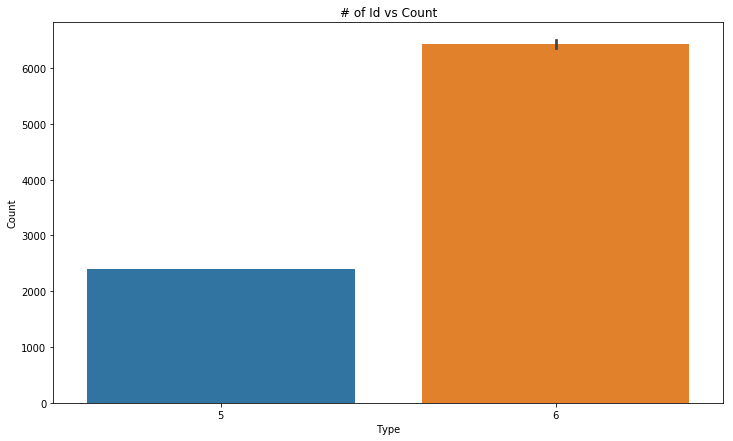

In [13]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [14]:
game_types = data['game'].value_counts()
game_types

Microsoft                            2400
TomClancysRainbowSix                 2400
MaddenNFL                            2400
CallOfDuty                           2394
LeagueOfLegends                      2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
GrandTheftAuto(GTA)                  2304
Cyberpunk2077                     

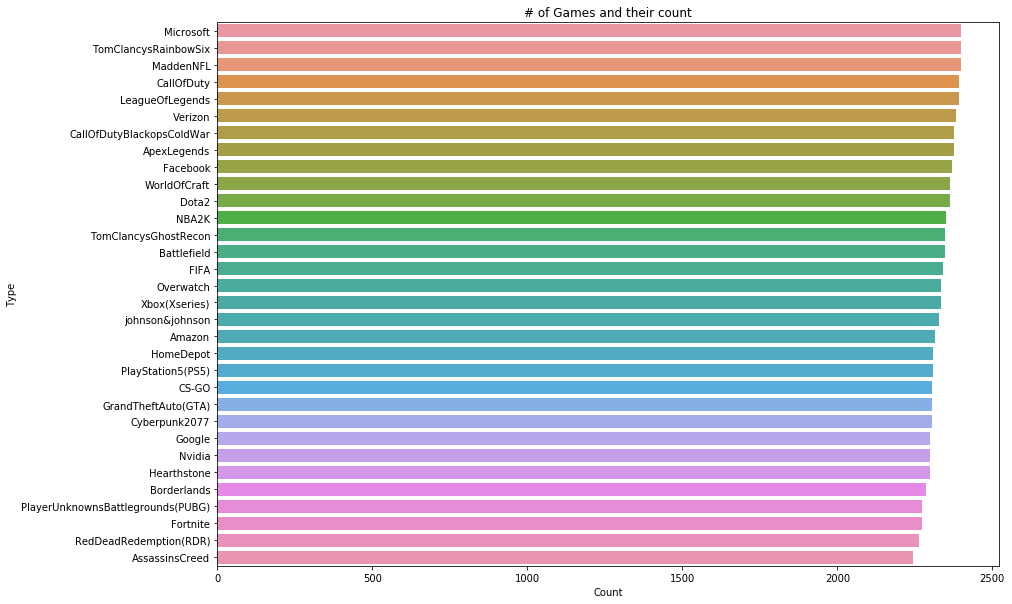

In [15]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)  
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

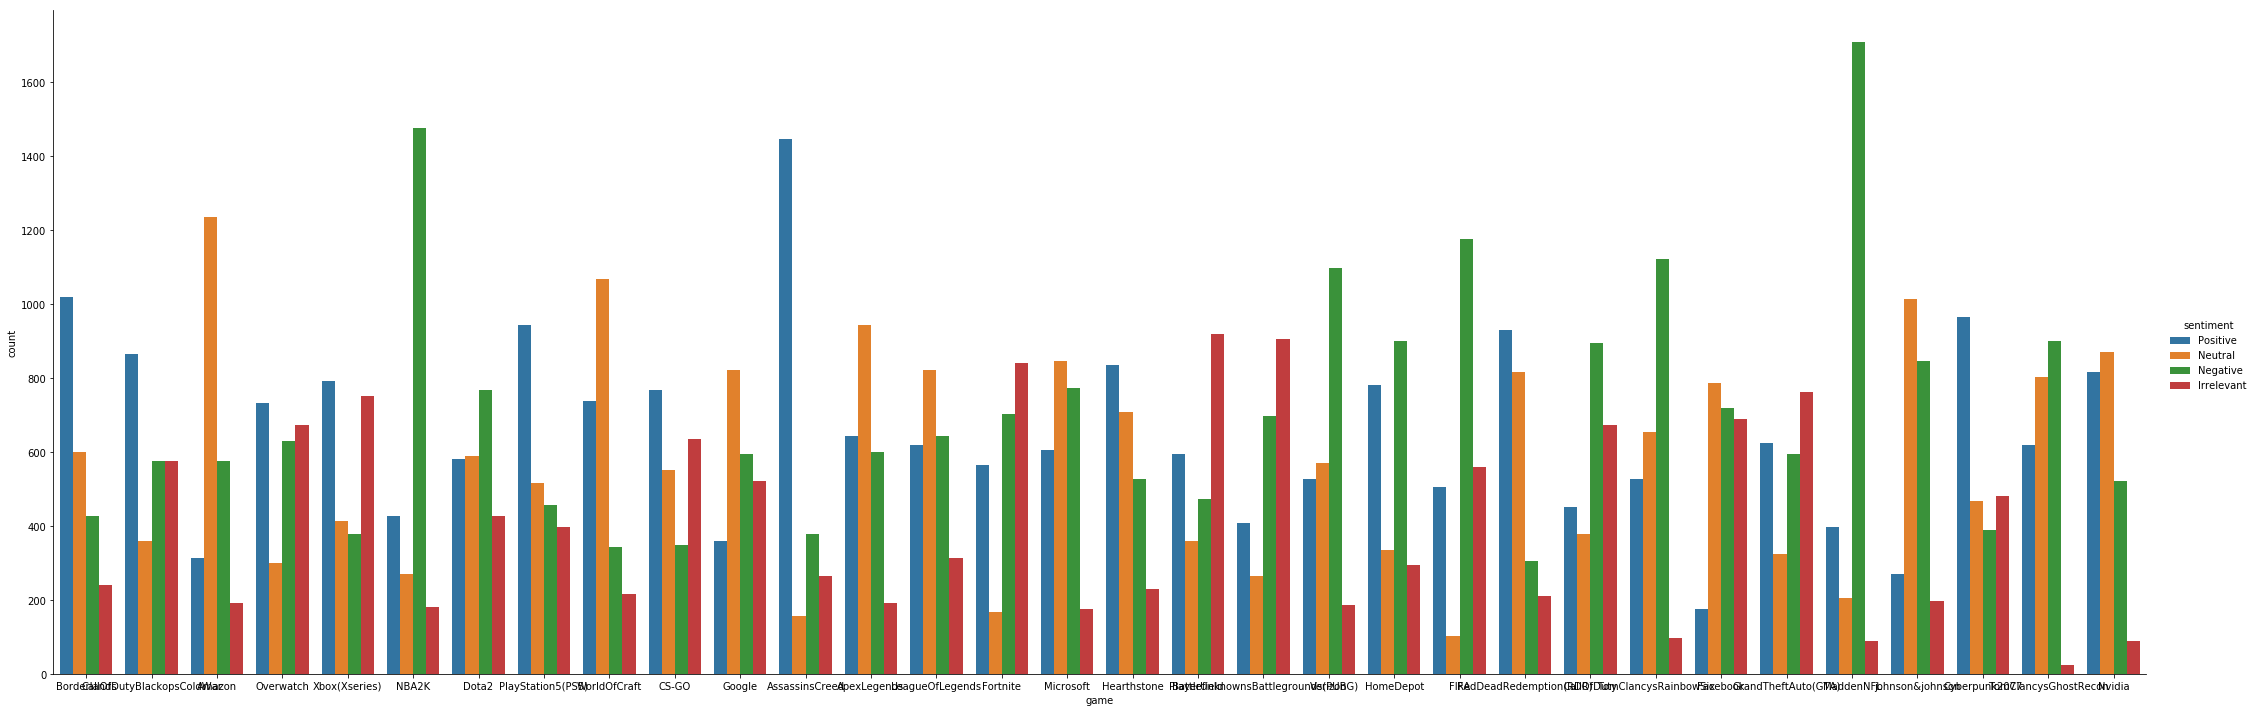

In [16]:
sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=data)

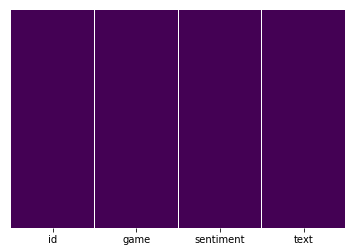

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

('Total records = ', 74681)


,Total Missing,In Percent
text,686,0.92
sentiment,0,0.00
game,0,0.00
id,0,0.00


In [19]:
data.dropna(subset=['text'],inplace=True)

total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

('Total records = ', 73995)


,Total Missing,In Percent
text,0,0.0
sentiment,0,0.0
game,0,0.0
id,0,0.0


In [20]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [21]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [22]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [23]:
train0.shape, train1.shape, train2.shape, train3.shape

((1863, 4), (1721, 4), (1072, 4), (1509, 4))

In [24]:
data=pd.concat([train0,train1,train2,train3],axis=0)

In [25]:
data

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
28,2405,Borderlands,Negative,the biggest dissappoinment in my life came bac...
35,2407,Borderlands,Negative,Man Gearbox really needs to fix this dissapoin...
36,2407,Borderlands,Negative,Man Gearbox really needs to fix these disappoi...
37,2407,Borderlands,Negative,Man Gearbox really needs to fix this disssapoi...
38,2407,Borderlands,Negative,Man Bethesda really needs to fix this dissapoi...


In [26]:
id_types = data['id'].value_counts()
id_types

1999    6
2584    6
2636    6
2632    6
2628    6
2624    6
2620    6
2616    6
2612    6
2608    6
2604    6
2600    6
2596    6
2592    6
2588    6
2580    6
2644    6
2576    6
2572    6
2564    6
2556    6
2552    6
2548    6
2544    6
2540    6
2536    6
2528    6
2524    6
2520    6
2516    6
       ..
2532    5
1737    5
1717    5
2503    5
1708    5
1613    5
1779    5
2411    5
2401    5
1731    5
1622    5
2595    4
1632    4
1863    4
333     3
1880    3
1929    3
16      3
1602    3
42      3
1959    3
9256    3
235     3
1763    3
1719    3
134     3
37      3
157     3
9267    2
9388    2
Name: id, Length: 1040, dtype: int64

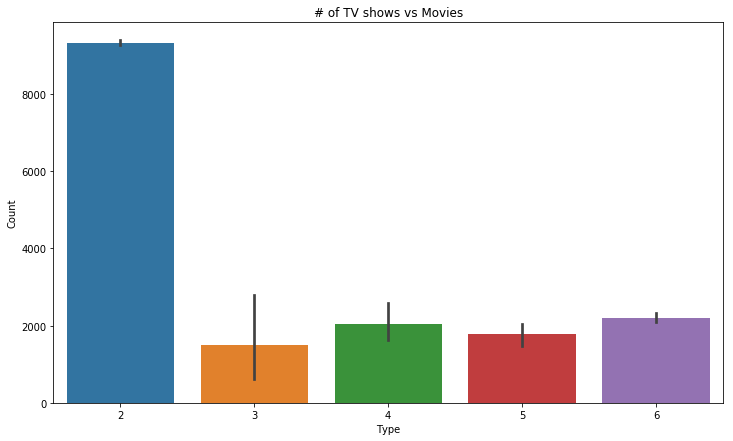

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [28]:
game_types = data['game'].value_counts()
game_types

Borderlands                  2279
CallOfDutyBlackopsColdWar    2192
Amazon                       1321
Overwatch                     373
Name: game, dtype: int64

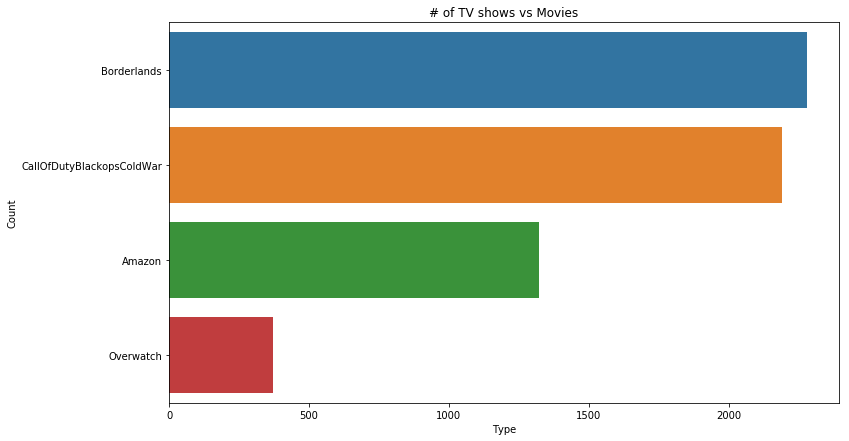

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [30]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types

Negative      1863
Positive      1721
Neutral       1509
Irrelevant    1072
Name: sentiment, dtype: int64

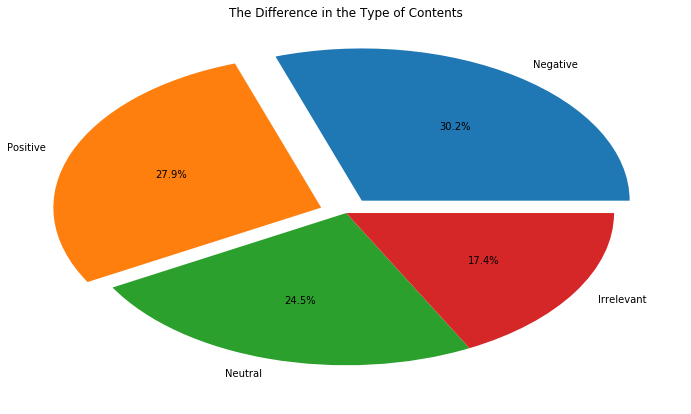

In [31]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

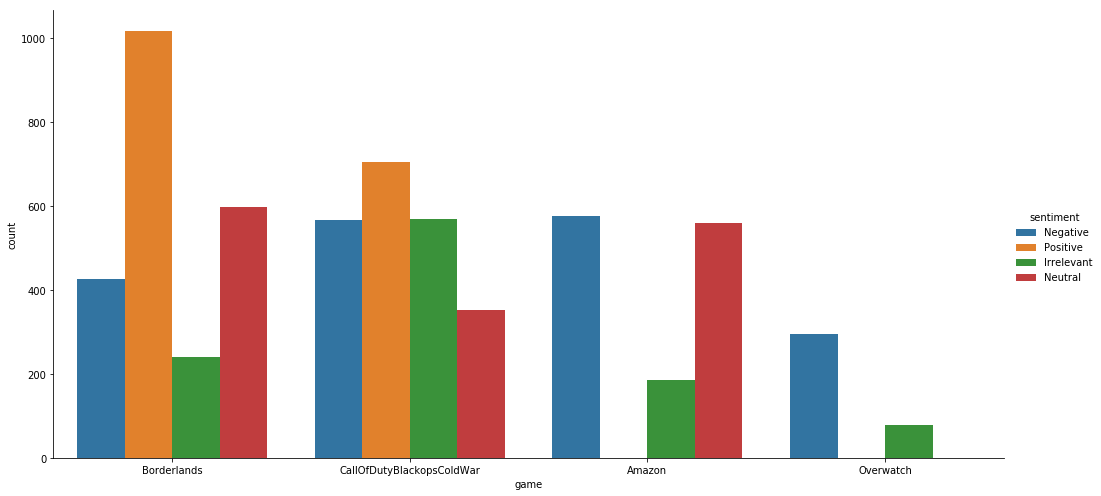

In [32]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data)

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [34]:
data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
v_data['sentiment']=label_encoder.fit_transform(v_data['sentiment'])
v_data['game']=label_encoder.fit_transform(v_data['game'])
data = data.drop(['id'],axis=1)

data

,game,sentiment,text
23,1,1,the biggest dissappoinment in my life came out...
24,1,1,The biggest disappointment of my life came a y...
25,1,1,The biggest disappointment of my life came a y...
26,1,1,the biggest dissappoinment in my life coming o...
27,1,1,For the biggest male dissappoinment in my life...
28,1,1,the biggest dissappoinment in my life came bac...
35,1,1,Man Gearbox really needs to fix this dissapoin...
36,1,1,Man Gearbox really needs to fix these disappoi...
37,1,1,Man Gearbox really needs to fix this disssapoi...
38,1,1,Man Bethesda really needs to fix this dissapoi...


In [35]:
data.nunique()

game            4
sentiment       4
text         5854
dtype: int64

In [36]:
v_data.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64